In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

import pipelines
from s3_client import s3_client
import columns as c
import common

s3_client = s3_client() 

credentials.py 16:28:23 INFO: Found credentials in shared credentials file: ~/.aws/credentials


In [2]:
_df = s3_client.read_newest_df_from_s3(common.FINAL_DATA_PATH.format(data_type='rent'))

s3_client.py 16:28:25 INFO: Downloading rent/final/rent_final_2019_12_25T00_23_27.parquet from flats-data bucket ...
s3_client.py 16:28:35 INFO: Successfully downloaded rent/final/rent_final_2019_12_25T00_23_27.parquet from flats-data bucket.


In [3]:
df = _df.drop(c.HEATING, axis=1)
print(df.shape)
df = df.dropna()
print(df.shape)
df[c.DATE_ADDED] = pd.to_datetime(df[c.DATE_ADDED]).dt.strftime("%Y%m%d").astype(int)
df[c.DATE_REFRESHED] = pd.to_datetime(df[c.DATE_REFRESHED]).dt.strftime("%Y%m%d").astype(int)

(85269, 41)
(81612, 41)


In [4]:
X = df.drop([c.PRICE, c.PRICE_M2, c.OFFER_ID], axis=1)
y = df[c.PRICE_M2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(
    estimator = rf,
    param_distributions = random_grid,
    n_iter = 2,
    cv = 2,
    verbose=3,
    random_state=42,
    n_jobs = -1,
)

# Fit the random search model
rf_random.fit(X_train, y_train)

def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  1.2min finished


In [ ]:
# Fit the grid search to the data
best_grid = rf_random.best_estimator_

grid_accuracy = evaluate(best_grid, X_test, y_test)

balcony__offer
1.0    82642
0.0     2627
Name: balcony__offer, dtype: int64


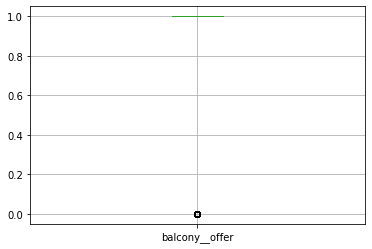

basement__clean
0.0    77183
1.0     8086
Name: basement__clean, dtype: int64


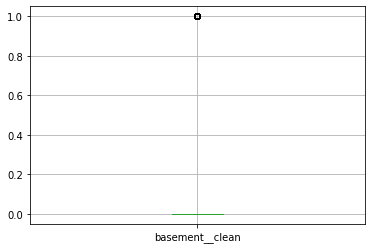

building_height__offer
4.0      28209
3.0      11492
5.0       8884
6.0       7502
2.0       5592
10.0      4883
7.0       4781
8.0       4077
1.0       1687
11.0      1490
9.0       1484
12.0      1223
15.0       809
17.0       756
16.0       539
13.0       479
14.0       404
52.0       188
18.0       173
44.0       106
22.0        93
19.0        70
30.0        52
25.0        47
20.0        43
23.0        32
28.0        31
41.0        21
32.0        20
24.0        17
54.0        12
50.0        11
21.0         9
36.0         8
55.0         5
29.0         5
27.0         5
38.0         4
39.0         3
43.0         3
51.0         3
33.0         3
31.0         3
127.0        2
26.0         2
46.0         2
34.0         1
48.0         1
35.0         1
53.0         1
37.0         1
Name: building_height__offer, dtype: int64


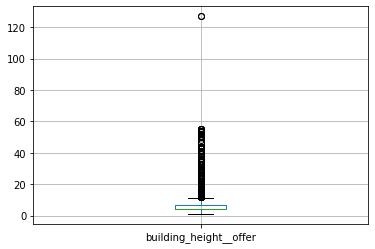

building_material__offer
3    70661
2    12197
1     2411
Name: building_material__offer, dtype: int64


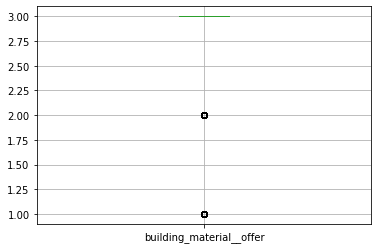

building_type__offer
3    36435
1    25563
2    23271
Name: building_type__offer, dtype: int64


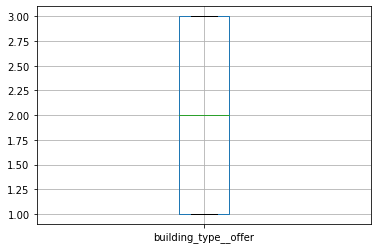

building_year__offer
2019.0    30664
2018.0     5313
2017.0     3499
2008.0     2896
2010.0     2759
          ...  
1868.0        1
1390.0        1
2020.0        1
1479.0        1
1789.0        1
Name: building_year__offer, Length: 183, dtype: int64


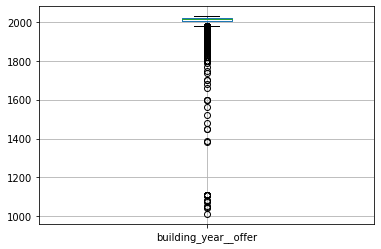

date_added__offer
2019-07-01    1155
2019-07-02     723
2019-09-30     593
2019-09-03     588
2019-09-04     587
              ... 
2018-02-25       1
2018-03-04       1
2018-05-19       1
2018-04-01       1
2018-07-08       1
Name: date_added__offer, Length: 693, dtype: int64
date_refreshed__offer
2019-06-13    2514
2019-06-12    1940
2019-06-11    1244
2019-07-18    1243
2019-06-10     987
              ... 
2014-07-31       1
2018-11-11       1
2017-09-13       1
2018-05-31       1
2018-02-27       1
Name: date_refreshed__offer, Length: 721, dtype: int64
desc_len__offer
805     73
935     71
1081    68
745     68
1302    66
        ..
5494     1
3165     1
5113     1
5177     1
3592     1
Name: desc_len__offer, Length: 4837, dtype: int64


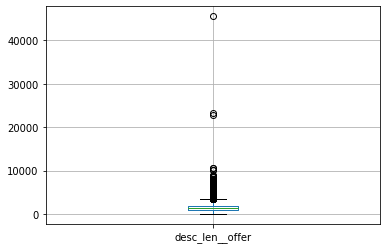

direct__offer
0.0    83396
1.0     1873
Name: direct__offer, dtype: int64


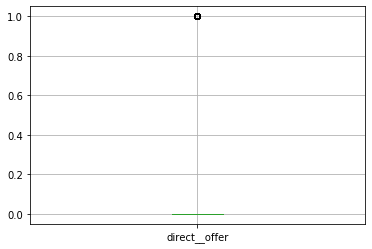

driveway__clean
0.0    85269
Name: driveway__clean, dtype: int64


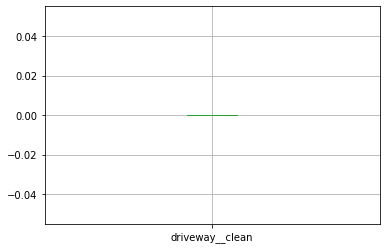

electricity__clean
0    83949
1     1320
Name: electricity__clean, dtype: int64


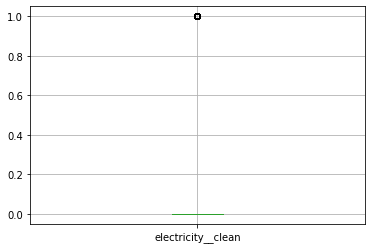

fence__clean
0.0    85245
1.0       24
Name: fence__clean, dtype: int64


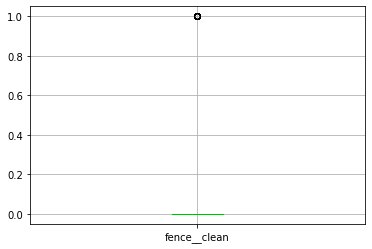

flat_state__offer
3    45786
4    38817
2      473
1      193
Name: flat_state__offer, dtype: int64


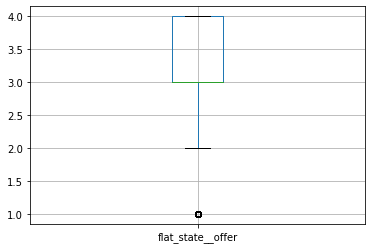

floor__offer
 1.0      19239
 2.0      16396
 3.0      13099
 0.0       9872
 4.0       9273
 5.0       5319
 6.0       3766
 7.0       2358
 8.0       1640
 10.0      1075
 9.0        926
 11.0       633
 12.0       327
 13.0       307
 14.0       253
 15.0       170
 16.0       133
 17.0        74
 18.0        39
 19.0        37
 23.0        33
 24.0        33
 27.0        31
 21.0        25
 28.0        23
 30.0        23
 34.0        19
 20.0        19
 29.0        18
-1.0         16
 22.0        15
 33.0        14
 31.0        11
 36.0        10
 26.0         9
 25.0         8
 32.0         6
 40.0         4
 35.0         3
 38.0         2
 39.0         2
 42.0         2
 43.0         2
 54.0         1
 68.0         1
 120.0        1
 127.0        1
 88.0         1
Name: floor__offer, dtype: int64


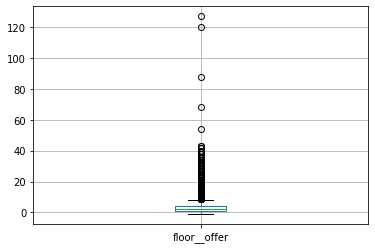

floor_number__clean
4.0      28544
3.0      11412
5.0       8850
6.0       7477
2.0       5514
10.0      4869
7.0       4766
8.0       4065
1.0       1642
11.0      1485
9.0       1481
12.0      1221
15.0       808
17.0       753
16.0       537
13.0       478
14.0       402
52.0       187
18.0       171
44.0       103
22.0        89
19.0        68
30.0        51
25.0        47
20.0        43
23.0        32
28.0        31
41.0        21
32.0        20
24.0        17
54.0        12
50.0        11
21.0         9
36.0         8
55.0         5
29.0         5
27.0         5
38.0         4
39.0         3
43.0         3
51.0         3
33.0         3
31.0         3
127.0        2
26.0         2
46.0         2
34.0         1
48.0         1
35.0         1
53.0         1
37.0         1
Name: floor_number__clean, dtype: int64


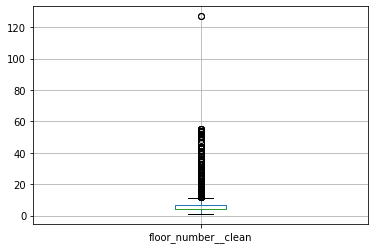

furniture__clean
0.0    67252
1.0    18017
Name: furniture__clean, dtype: int64


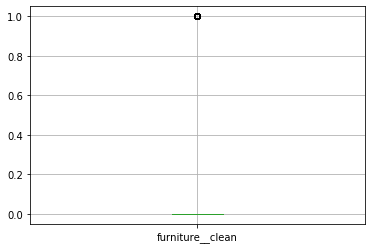

gas__clean
0.0    81282
1.0     3987
Name: gas__clean, dtype: int64


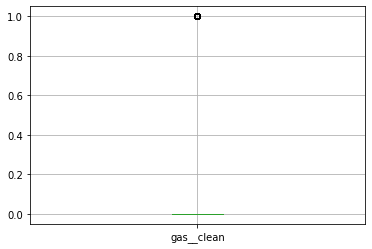

heating__offer
3.0    60717
2.0     3951
1.0      312
4.0       20
Name: heating__offer, dtype: int64


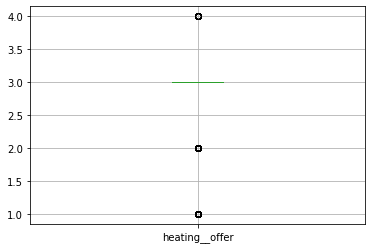

internet__clean
0.0    73667
1.0    11602
Name: internet__clean, dtype: int64


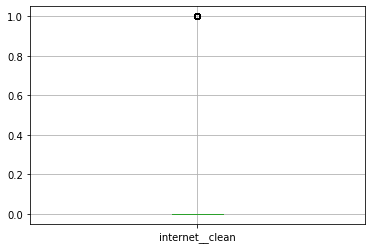

kitchen_furniture__clean
0.0    78466
1.0     6803
Name: kitchen_furniture__clean, dtype: int64


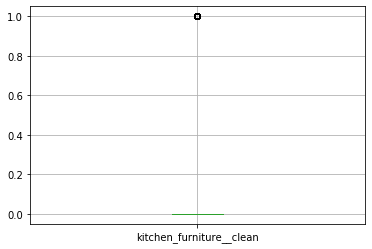

lat__offer
52.229676    367
52.194157    332
53.126000    240
54.351678    189
49.822377    182
            ... 
52.198547      1
54.408808      1
49.802721      1
51.053360      1
52.259017      1
Name: lat__offer, Length: 35848, dtype: int64


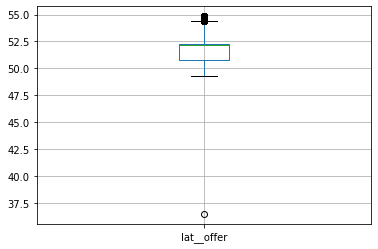

lift__clean
0.0    57790
1.0    27479
Name: lift__clean, dtype: int64


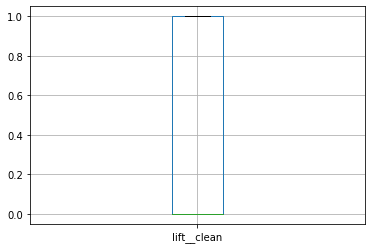

lon__offer
21.034696    332
21.012229    321
18.007900    240
21.002612    184
19.058384    183
            ... 
19.933400      1
17.029330      1
19.946777      1
21.062806      1
19.443490      1
Name: lon__offer, Length: 36296, dtype: int64


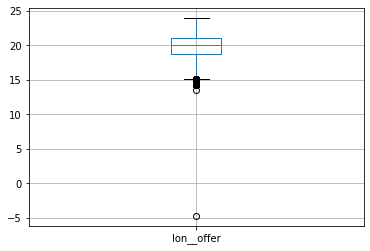

market_type__offer
1.0    84265
0.0     1003
Name: market_type__offer, dtype: int64


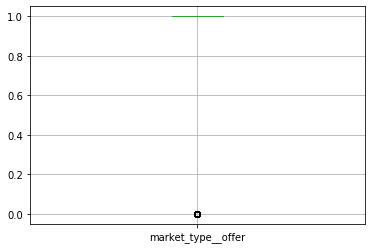

offer_id__offer
morizon-62830/369/OMW    1
morizon-16209/MW/MAX     1
morizon-PRP-MW-62221     1
morizon-QS612879         1
morizon-8/6131/OMW       1
                        ..
morizon-TC883248         1
morizon-MW-25893         1
morizon-FKK-MW-12120     1
morizon-314/4372/OMW     1
morizon-1058/7466/OMW    1
Name: offer_id__offer, Length: 85268, dtype: int64
parking_spot__clean
0.0      73926
1.0      10790
2.0        451
3.0         28
4.0         18
10.0        18
5.0         10
20.0         6
30.0         4
50.0         3
8.0          3
6.0          2
100.0        2
15.0         2
12.0         1
37.0         1
127.0        1
22.0         1
125.0        1
25.0         1
Name: parking_spot__clean, dtype: int64


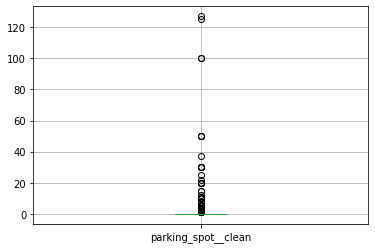

price__offer
2500.0     4566
2000.0     3979
1800.0     3133
2200.0     3074
3000.0     2807
           ... 
6643.0        1
120.0         1
5199.0        1
12840.0       1
3828.0        1
Name: price__offer, Length: 1189, dtype: int64


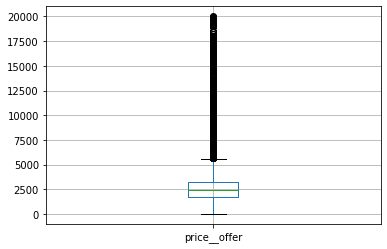

price_m2__offer
50.00    2295
40.00    1157
60.00     834
33.33     757
66.67     736
         ... 
88.41       1
71.08       1
17.68       1
71.13       1
12.51       1
Name: price_m2__offer, Length: 7045, dtype: int64


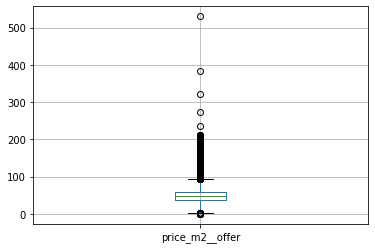

promotion_counter__offer
0.0      78750
20.0      1765
19.0      1352
1.0        843
44.0       447
         ...  
67.0         1
74.0         1
115.0        1
179.0        1
154.0        1
Name: promotion_counter__offer, Length: 120, dtype: int64


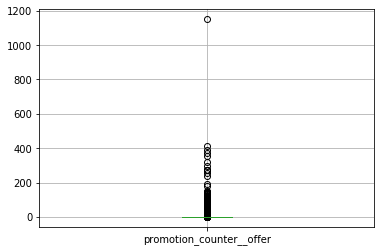

room_n__offer
2.0      42157
3.0      23524
1.0      11807
4.0       6009
5.0       1311
6.0        278
7.0         64
8.0         35
10.0        19
9.0         16
127.0        8
14.0         6
18.0         5
15.0         4
20.0         4
11.0         4
21.0         3
13.0         2
34.0         2
12.0         2
32.0         1
25.0         1
87.0         1
43.0         1
42.0         1
100.0        1
35.0         1
96.0         1
22.0         1
Name: room_n__offer, dtype: int64


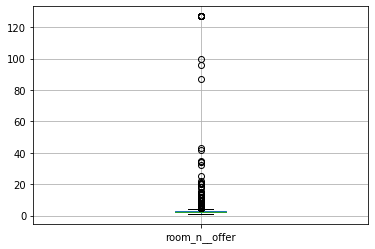

sewers__clean
0    84424
1      845
Name: sewers__clean, dtype: int64


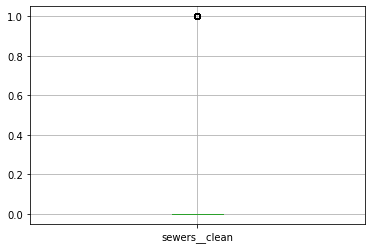

size__offer
50.00     3800
40.00     3150
45.00     2321
60.00     2184
38.00     1979
          ... 
73.64        1
52.23        1
117.50       1
56.16        1
107.78       1
Name: size__offer, Length: 4147, dtype: int64


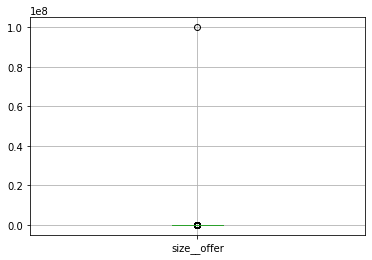

taras__offer
0.0    80299
1.0     4970
Name: taras__offer, dtype: int64


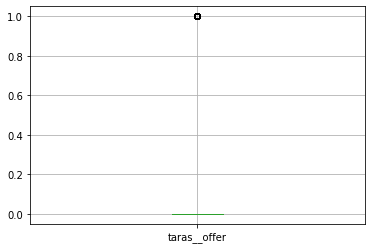

telecom__clean
0.0    75879
1.0     9390
Name: telecom__clean, dtype: int64


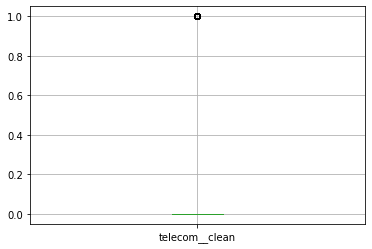

view_count__offer
11.0     3965
12.0     3904
10.0     3708
13.0     3680
14.0     3530
         ... 
595.0       1
379.0       1
685.0       1
934.0       1
748.0       1
Name: view_count__offer, Length: 898, dtype: int64


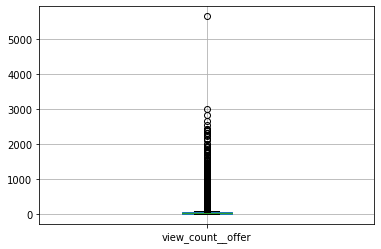

water__offer
0    72144
1    13125
Name: water__offer, dtype: int64


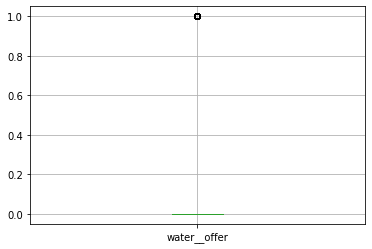

cluster_mean_price_m2__feature
4191.92    35600
2326.11    15175
2375.57     5994
2638.11     4810
1870.76     2515
           ...  
2490.00        1
33.33          1
2275.00        1
5000.00        1
5.00           1
Name: cluster_mean_price_m2__feature, Length: 286, dtype: int64


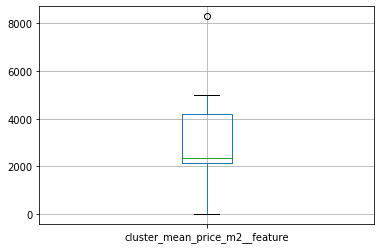

cluster_mean_price__feature
3571.432584    35600
2436.271186    15175
2283.709677     5994
2509.000000     4810
1916.666667     2515
2079.235294     2294
2580.000000     1696
1570.714286     1357
1910.000000     1147
1700.000000     1036
1550.000000      861
1925.000000      830
1600.000000      709
1500.000000      706
2631.250000      697
1000.000000      521
1608.333333      443
1125.000000      428
2220.000000      421
1497.500000      337
1800.000000      336
1525.000000      317
1233.333333      308
1400.000000      267
1900.000000      250
1974.750000      218
2510.000000      188
2050.000000      187
1340.000000      185
866.666667       183
800.000000       180
1975.000000      146
1300.000000      135
1533.333333      129
4500.000000       96
1200.000000       94
1645.000000       91
2466.666667       85
1250.000000       76
1450.000000       67
2500.000000       65
2000.000000       57
1325.000000       52
3300.000000       51
550.000000        49
1350.000000       38
1225.0

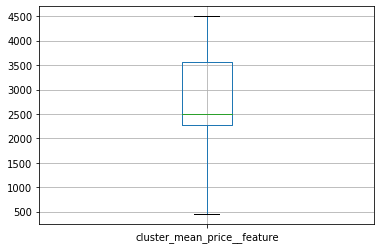

cluster_id__feature
497    35600
445    15175
447     5994
465     4810
392     2515
       ...  
81         1
17         1
484        1
400        1
64         1
Name: cluster_id__feature, Length: 495, dtype: int64


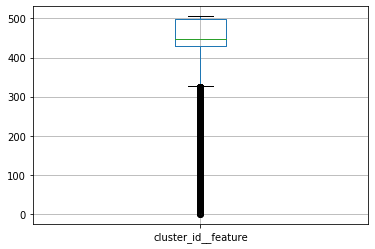

cluster_center_dist_km__feature
0.00     1367
1.42      538
2.89      467
1.07      427
2.06      406
         ... 
13.88       1
13.28       1
13.69       1
16.95       1
14.35       1
Name: cluster_center_dist_km__feature, Length: 1500, dtype: int64


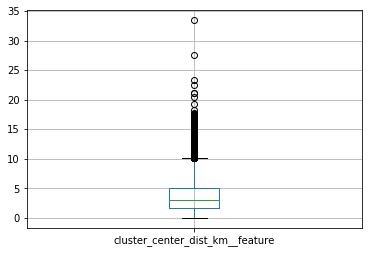

cluster_coords_factor__feature
5923.408084    370
5268.432095    369
3392.240749    240
2878.551444    189
5411.924774    187
              ... 
1875.720975      1
2220.216781      1
6924.598860      1
1820.319221      1
10.000000        1
Name: cluster_coords_factor__feature, Length: 25659, dtype: int64


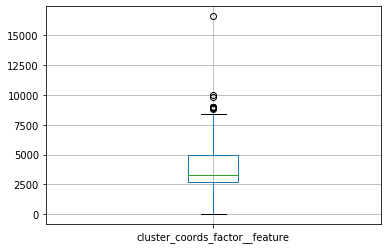

In [5]:
for c in df.columns:
    try:
        print(c)
        print(df[c].value_counts())
        df.boxplot(column=c)
        plt.show()
    except KeyError:
        continue